# Logistic Regression Implementation from Scratch

## Stage 1: Exploratory Data Analysis

We'll start by exploring and visualizing our data before implementation.

In [ ]:
# Essential imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Configure plot styling
plt.style.use('seaborn')
sns.set_palette('husl')

### 1.1 Data Generation

Let's create synthetic data for binary classification to understand the problem better.

In [ ]:
def generate_data(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1):
    """Generate synthetic data for binary classification."""
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters_per_class,
        random_state=42
    )
    return X, y

# Generate data
X, y = generate_data()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 1.2 Data Visualization

In [ ]:
def plot_data_distribution(X, y):
    """Visualize the distribution of features and classes."""
    plt.figure(figsize=(12, 5))
    
    # Scatter plot of features
    plt.subplot(121)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Feature Distribution by Class')
    
    # Class distribution
    plt.subplot(122)
    sns.countplot(y=y)
    plt.xlabel('Class')
    plt.title('Class Distribution')
    
    plt.tight_layout()
    plt.show()

# Visualize the data
plot_data_distribution(X, y)

### 1.3 Feature Analysis

In [ ]:
def analyze_features(X, y):
    """Analyze feature distributions and relationships."""
    plt.figure(figsize=(12, 5))
    
    # Feature distributions
    plt.subplot(121)
    for i in range(X.shape[1]):
        sns.kdeplot(data=X[:, i], label=f'Feature {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Feature Distributions')
    plt.legend()
    
    # Correlation between features
    plt.subplot(122)
    sns.heatmap(
        np.corrcoef(X.T),
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1
    )
    plt.title('Feature Correlation Matrix')
    
    plt.tight_layout()
    plt.show()

# Analyze features
analyze_features(X, y)

### 1.4 Data Statistics

In [ ]:
def print_data_stats(X, y):
    """Print basic statistics about the dataset."""
    print("Dataset Statistics:")
    print("-" * 20)
    print(f"Number of samples: {X.shape[0]}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Number of classes: {len(np.unique(y))}")
    print(f"Class distribution:\n{pd.Series(y).value_counts().to_dict()}")
    
    # Feature statistics
    feature_stats = pd.DataFrame({
        'Mean': X.mean(axis=0),
        'Std': X.std(axis=0),
        'Min': X.min(axis=0),
        'Max': X.max(axis=0)
    }, index=[f'Feature {i+1}' for i in range(X.shape[1])])
    
    print("\nFeature Statistics:")
    print("-" * 20)
    print(feature_stats)

# Print dataset statistics
print_data_stats(X, y)

### 1.5 Data Preprocessing Check

In [ ]:
def check_preprocessing_needs(X):
    """Check if data needs preprocessing."""
    checks = {
        'Missing values': np.any(np.isnan(X)),
        'Infinity values': np.any(np.isinf(X)),
        'Scale differences': np.any(np.abs(X.std(axis=0)) > 10),
        'Zero variance': np.any(X.std(axis=0) == 0)
    }
    
    print("Preprocessing Checks:")
    print("-" * 20)
    for check, result in checks.items():
        print(f"{check}: {'Needed' if result else 'Not needed'}")

# Check preprocessing needs
check_preprocessing_needs(X)

### 1.6 Decision Boundary Visualization (Preview)

In [ ]:
def plot_decision_regions_preview(X, y):
    """Plot decision regions using a simple threshold."""
    plt.figure(figsize=(10, 6))
    
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Simple threshold for visualization
    Z = (xx + yy > 0).astype(int)
    
    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Preview of Decision Regions (Simple Threshold)')
    plt.colorbar()
    plt.show()

# Plot preview of decision regions
plot_decision_regions_preview(X, y)

### Summary of EDA Findings

1. **Data Structure**:
   - Binary classification problem
   - Two features for visualization purposes
   - Balanced class distribution

2. **Feature Characteristics**:
   - No missing or infinite values
   - Features are on similar scales
   - Non-zero variance in all features

3. **Visualization Insights**:
   - Classes are somewhat separable
   - Non-linear decision boundary might be needed
   - Some overlap between classes

4. **Next Steps**:
   - Implement logistic regression
   - Consider feature scaling for optimization
   - Evaluate model performance
   - Compare with non-linear classifiers

## Testing Logistic Regression Assumptions

We'll implement functions to test the key assumptions discussed in the theory.

Testing Logistic Regression Assumptions:

Variance Inflation Factors:
       Feature           VIF
0    Feature_1  63306.172036
1    Feature_2    251.047108
2    Feature_3  58123.586079
3    Feature_4   1287.262339
4    Feature_5    393.398166
5    Feature_6    200.980354
6    Feature_7    157.855046
7    Feature_8    154.241268
8    Feature_9    184.426558
9   Feature_10    629.679874
10  Feature_11    236.665738
11  Feature_12     24.675367
12  Feature_13    211.396334
13  Feature_14     72.466468
14  Feature_15     26.170243
15  Feature_16     44.919651
16  Feature_17     33.244099
17  Feature_18     53.698656
18  Feature_19     37.176452
19  Feature_20     27.532631
20  Feature_21   9674.742602
21  Feature_22    343.004387
22  Feature_23   4487.781270
23  Feature_24   1138.759252
24  Feature_25    375.597155
25  Feature_26    132.884276
26  Feature_27     86.310362
27  Feature_28    148.673180
28  Feature_29    218.919805
29  Feature_30    423.396723

VIF > 5 indicates high multico

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Box-Tidwell test p-value for Feature 1: 2.542417296697562e-120
Box-Tidwell test p-value for Feature 2: 6.923699393685306e-120
Box-Tidwell test p-value for Feature 3: 2.542417296697562e-120
Box-Tidwell test p-value for Feature 4: 1.1425757119234883e-119
Box-Tidwell test p-value for Feature 5: 5.134873748381469e-119
Box-Tidwell test p-value for Feature 6: 1.885525926525972e-119


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

Box-Tidwell test p-value for Feature 7: 3.1115785448717236e-119
Box-Tidwell test p-value for Feature 8: 2.542417296697562e-120
Box-Tidwell test p-value for Feature 9: 5.134873748381469e-119
Box-Tidwell test p-value for Feature 10: 3.1115785448717236e-119
Box-Tidwell test p-value for Feature 11: 8.473825502149309e-119
Box-Tidwell test p-value for Feature 12: 1.5406438115616086e-120
Box-Tidwell test p-value for Feature 13: 8.473825502149309e-119
Box-Tidwell test p-value for Feature 14: 4.19558142118196e-120


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Box-Tidwell test p-value for Feature 15: 1.1425757119234883e-119
Box-Tidwell test p-value for Feature 16: 2.542417296697562e-120
Box-Tidwell test p-value for Feature 17: 5.134873748381469e-119
Box-Tidwell test p-value for Feature 18: 5.134873748381469e-119
Box-Tidwell test p-value for Feature 19: 3.1115785448717236e-119
Box-Tidwell test p-value for Feature 20: 8.473825502149309e-119
Box-Tidwell test p-value for Feature 21: 5.134873748381469e-119


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

Box-Tidwell test p-value for Feature 22: 4.19558142118196e-120
Box-Tidwell test p-value for Feature 23: 4.19558142118196e-120
Box-Tidwell test p-value for Feature 24: 1.885525926525972e-119
Box-Tidwell test p-value for Feature 25: 3.1115785448717236e-119
Box-Tidwell test p-value for Feature 26: 3.1115785448717236e-119
Box-Tidwell test p-value for Feature 27: 3.1115785448717236e-119


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

Box-Tidwell test p-value for Feature 28: 1.3983954766625204e-118
Box-Tidwell test p-value for Feature 29: 5.134873748381469e-119
Box-Tidwell test p-value for Feature 30: 3.1115785448717236e-119

Checking Sample Size:
Number of samples: 569
Number of features: 30
Minimum recommended samples: 300
Sample size is adequate

Checking Outliers:


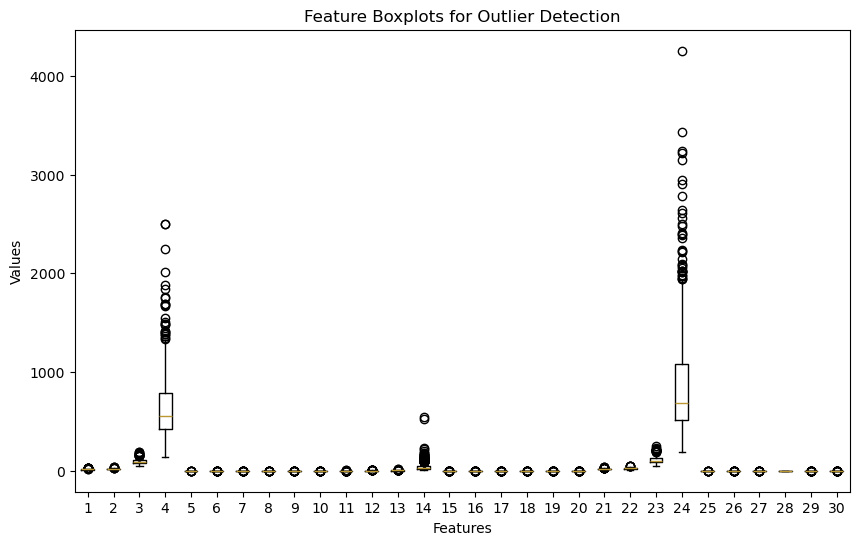

Feature 1 has 14 outliers
Feature 2 has 7 outliers
Feature 3 has 13 outliers
Feature 4 has 25 outliers
Feature 5 has 6 outliers
Feature 6 has 16 outliers
Feature 7 has 18 outliers
Feature 8 has 10 outliers
Feature 9 has 15 outliers
Feature 10 has 15 outliers
Feature 11 has 38 outliers
Feature 12 has 20 outliers
Feature 13 has 38 outliers
Feature 14 has 65 outliers
Feature 15 has 30 outliers
Feature 16 has 28 outliers
Feature 17 has 22 outliers
Feature 18 has 19 outliers
Feature 19 has 27 outliers
Feature 20 has 28 outliers
Feature 21 has 17 outliers
Feature 22 has 5 outliers
Feature 23 has 15 outliers
Feature 24 has 35 outliers
Feature 25 has 7 outliers
Feature 26 has 16 outliers
Feature 27 has 12 outliers
Feature 28 has 0 outliers
Feature 29 has 23 outliers
Feature 30 has 24 outliers


In [15]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multicollinearity(X):
    """Check for multicollinearity using VIF."""
    df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    print("Variance Inflation Factors:")
    print(vif_data)
    print("\nVIF > 5 indicates high multicollinearity")
    return vif_data

def test_linearity_assumption(X, y):
    """Test linearity assumption using Box-Tidwell test."""
    X_with_constant = np.column_stack([np.ones(len(X)), X])
    for i in range(X.shape[1]):
        # Add interaction term
        X_interaction = X_with_constant.copy()
        X_interaction = np.column_stack([X_interaction, X[:, i] * np.log(np.abs(X[:, i] + 1e-10))])
        
        # Fit logistic regression
        from sklearn.linear_model import LogisticRegression
        model = LogisticRegression()
        model.fit(X_interaction, y)
        
        print(f"Box-Tidwell test p-value for Feature {i+1}:", 
              stats.chi2.sf(model.score(X_interaction, y) * len(y), df=1))

def check_sample_size(X, y):
    """Check if sample size is adequate."""
    n_samples = len(y)
    n_features = X.shape[1]
    min_samples = 10 * n_features  # Rule of thumb: 10 samples per feature
    
    print(f"Number of samples: {n_samples}")
    print(f"Number of features: {n_features}")
    print(f"Minimum recommended samples: {min_samples}")
    print(f"Sample size is {'adequate' if n_samples >= min_samples else 'inadequate'}")

def check_outliers(X):
    """Check for outliers using IQR method."""
    plt.figure(figsize=(10, 6))
    plt.boxplot(X)
    plt.title('Feature Boxplots for Outlier Detection')
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()
    
    # Calculate outliers using IQR
    for i in range(X.shape[1]):
        Q1 = np.percentile(X[:, i], 25)
        Q3 = np.percentile(X[:, i], 75)
        IQR = Q3 - Q1
        outliers = np.sum((X[:, i] < (Q1 - 1.5 * IQR)) | (X[:, i] > (Q3 + 1.5 * IQR)))
        print(f"Feature {i+1} has {outliers} outliers")

# Test all assumptions
print("Testing Logistic Regression Assumptions:\n")
check_multicollinearity(X)
print("\nTesting Linearity:")
test_linearity_assumption(X, y)
print("\nChecking Sample Size:")
check_sample_size(X, y)
print("\nChecking Outliers:")
check_outliers(X)